In [1]:
import torch
from torch.utils.data import DataLoader

from model.encoder import Encoder
from model.decoder import Decoder
from datautil.waymo_dataset import WaymoDataset
from datautil.waymo_rast_dataset import waymo_raster_collate_fn

dataset = WaymoDataset('./data/tfrecords', './data/idxs')
dataloader = DataLoader(dataset, batch_size=1, collate_fn=lambda x: waymo_raster_collate_fn(x))

data0 = next(iter(dataloader))

In [2]:
scene_img_batch, tgt_img_batch, agent_points_batch, states_feat_batch, agents_batch_mask, \
                states_padding_mask_batch, (states_hidden_mask_BP_batch,states_hidden_mask_CBP_batch,states_hidden_mask_GDP_batch) = data0

In [3]:
print(scene_img_batch.shape)
message = 'scene img : [6,500,500]. \n6-channel image input : \n\t 0: drivable area \n\t 1: centerline \n\t 2: road lane \n\t 3: red lights \
\n\t 4: yellow lights \n\t 5: green lights'
print(message)
print('')
print(tgt_img_batch.shape)
message = 'tgt_img : [num_agents,500,500]. \noccupied map img with line width 1'
print(message)
print('')
print(agent_points_batch.shape)
message = 'agent points : [num_agents,4]. \neach agent\'s start(current) point and end point \nstart_x, start_y, end_x, end_y'
print(message)
print('')
print(states_feat_batch.shape)
message = 'states feat : [num_agent,time_steps,9]. \number of ntime steps is 91. \n9-channel input: \n\t (x,y,bbox_yaw,vel_x,vel_y,vel_yaw,width,length,timestamp)'
print(message)
print('')
print(agents_batch_mask.shape)
message = 'agents batch mask : [num_agent,num_agent]. \nagent-to-agent mask. If two agents are from different scenes, it is False, else, True'
print(message)
print('')
print(states_padding_mask_batch.shape)
message = 'state padding mask : [num_agent,time_steps]. \nif state value is invalid in specific time step, it is False, else, True'
print(message)
print('')
print(states_hidden_mask_BP_batch.shape)
message = 'states hidden mask : [num_agent,time_steps]. \nfollowing scene transformer, True mean that value is masked to be inferred'
print(message)

(6, 500, 500)
scene img : [6,500,500]. 
6-channel image input : 
	 0: drivable area 
	 1: centerline 
	 2: road lane 
	 3: red lights 
	 4: yellow lights 
	 5: green lights

(7, 500, 500)
tgt_img : [num_agents,500,500]. 
occupied map img with line width 1

(7, 4)
agent points : [num_agents,4]. 
each agent's start(current) point and end point 
start_x, start_y, end_x, end_y

(7, 91, 9)
states feat : [num_agent,time_steps,9]. 
umber of ntime steps is 91. 
9-channel input: 
	 (x,y,bbox_yaw,vel_x,vel_y,vel_yaw,width,length,timestamp)

(7, 7)
agents batch mask : [num_agent,num_agent]. 
agent-to-agent mask. If two agents are from different scenes, it is False, else, True

(7, 91)
state padding mask : [num_agent,time_steps]. 
if state value is invalid in specific time step, it is False, else, True

(7, 91)
states hidden mask : [num_agent,time_steps]. 
following scene transformer, True mean that value is masked to be inferred


In [4]:
import matplotlib.pyplot as plt

a = scene_img_batch[0]


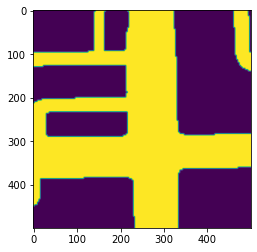

In [5]:
plt.imshow(a)
plt.show()